In [1]:
import sys
sys.path.append("..") # this adds to path parent directory in order to import utils file
sys.path.append("../gmm/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import umap
import random
from tqdm import tqdm
import numpy as np
import scipy


import gmm_utils


elbowAnalysis
silhouetteAnalyis


In [2]:
# dataset = 'brainCIDR'
# df, truth = gmm_utils.loadData(dataset)

In [3]:
def getStatisticsForDataset(df, name, truth = None):
    def addStatistics(s, statistics, name = '#_cells_per_gene', reference = None):
        statistics[f'{name}_avg'] = s.mean()
        if reference is not None:
            statistics[f'{name}_perc_avg'] = s.mean()/reference
        statistics[f'{name}_std'] = s.std()
        statistics[f'{name}_kurtosis'] = s.kurtosis()
        statistics[f'{name}_skew'] = s.skew()
        statistics[f'{name}_median'] = s.median()
        return statistics
    ## Generate plots
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    plt.title(f'Logscale sum of counts per genes for {name}')
    df.sum(axis=0).hist(bins = 100, log = True)

    plt.subplot(122)
    plt.title(f'Logscale sum of counts per cells for {name}')
    df.sum(axis=1).hist(bins = 100, log = True)
    
    ## Calculate statistics
    statistics = {}
    statistics['name'] = name
    statistics['nb_cells'] = df.shape[0]
    statistics['nb_genes'] = df.shape[1]
    statistics['percentage_0'] = Counter(np.ravel(df.values))[0]/len(np.ravel(df.values))
    statistics['max'] = df.max().max()
    
    discreteDf = np.zeros(df.shape)
    discreteDf[np.where(df>0)] = 1
    nbCellsPerGene=pd.Series(discreteDf.sum(axis =0 ))
    statistics = addStatistics(nbCellsPerGene, statistics, name = '#_cells_per_gene', reference=df.shape[0])
    nbGenesPerCells=pd.Series(discreteDf.sum(axis =1))
    statistics = addStatistics(nbGenesPerCells, statistics, name = '#_genes_per_cell', reference=df.shape[1])
    
    ## Truth related statistics
    if truth is not None:
        statistics['#clusters']=len(truth['clusters'].unique())
        statistics['expected_avg_cluster_size'] = df.shape[0]//len(truth['clusters'].unique())
        clusterSizes = truth['clusters'].value_counts().values
        statistics['max_cluster_size'] = clusterSizes[0]
        statistics['min_cluster_size'] = clusterSizes[-1]
    
    return statistics


In [4]:
cols = ['name', 'nb_cells', 'nb_genes', 'percentage_0', 'max', '#_cells_per_gene_avg', '#_cells_per_gene_perc_avg',
        '#_cells_per_gene_std', '#_cells_per_gene_kurtosis', '#_cells_per_gene_skew', '#_cells_per_gene_median',
        '#_genes_per_cell_avg', '#_genes_per_cell_perc_avg', '#_genes_per_cell_std', '#_genes_per_cell_kurtosis',
        '#_genes_per_cell_skew', '#_genes_per_cell_median']

r = pd.DataFrame(columns=cols)

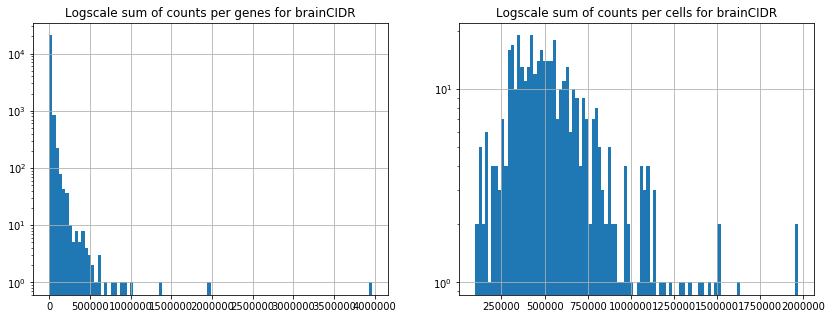

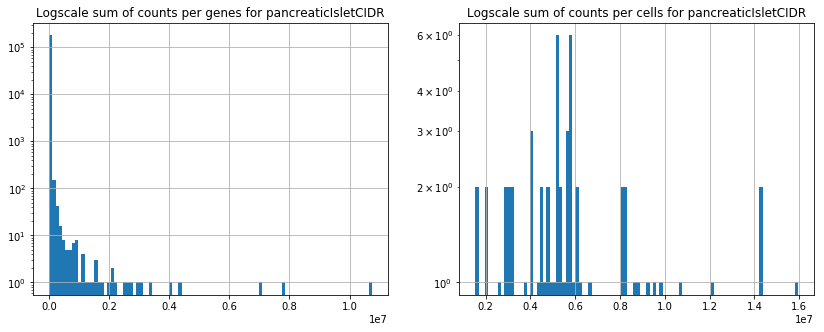

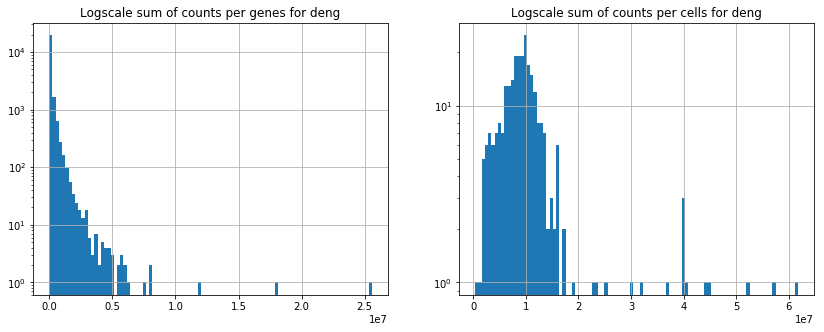

In [5]:
datasets = ['brainCIDR', 'pancreaticIsletCIDR', 'deng']
for dataset in datasets:
    df, truth = gmm_utils.loadData(dataset)
    s = getStatisticsForDataset(df, dataset, truth)
    r = r.append(s, ignore_index=True)

In [6]:
r.set_index('name', inplace=True, drop = True)
r = r.T
r = r.applymap("{:,.2f}".format)

In [7]:
r

name,brainCIDR,pancreaticIsletCIDR,deng
nb_cells,420.00,60.00,268.00
nb_genes,"22,085.00","180,253.00","22,431.00"
percentage_0,0.81,0.78,0.60
max,"58,272.00","1,429,282.00","693,974.00"
#_cells_per_gene_avg,78.11,13.30,106.42
#_cells_per_gene_perc_avg,0.19,0.22,0.40
#_cells_per_gene_std,90.01,15.29,100.42
#_cells_per_gene_kurtosis,1.17,0.59,-1.45
#_cells_per_gene_skew,1.36,1.22,0.44
#_cells_per_gene_median,41.00,7.00,66.00
